In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
data = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\Machine Learning Projects\Car Price Prediction\car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## ***----------------------------------  Preprocessing  ------------------------------------***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
# Check for missing values in the dataset
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
# Check for duplicated rows values in the dataset
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [6]:
# describe() numerical columns
data.select_dtypes(include =  'number').describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
# describe() categorical columns
data.select_dtypes(include = 'object').describe()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [8]:
# Top and Bottom Value Counts for Each Column
def Top_and_Bottom_Combined (df, col, n = 5):
    top_counts    = df[col].value_counts().head(n)
    bottom_counts = df[col].value_counts().tail(n)

    combined = pd.concat([top_counts, bottom_counts], axis = 0)
    combined.columns = 'Top_and_Bottom_Combined'
    return combined

for col in data.select_dtypes(include = 'object'):
    print(f'Top & Bottom Value Counts for {col}')
    print(Top_and_Bottom_Combined(df = data, col = col))
    print('-' * 50)

Top & Bottom Value Counts for Levy
Levy
-       5709
765      482
891      453
639      403
640      398
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, dtype: int64
--------------------------------------------------
Top & Bottom Value Counts for Manufacturer
Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, dtype: int64
--------------------------------------------------
Top & Bottom Value Counts for Model
Model
Prius                     1069
Sonata                    1067
Camry                      929
Elantra                    910
E 350                      534
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: count, dtype: int64
----------------------

## ***------------------------  Handling Categorical Columns  --------------------------***

In [9]:
data['Levy'] = data['Levy'].replace('-', 0)
data['Levy'] = pd.to_numeric(data['Levy'])

data['Leather interior'] = data['Leather interior'].replace({'Yes' : 1, 'No' : 0})

data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = pd.to_numeric(data['Mileage'])

data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
data['Engine volume'] = pd.to_numeric(data['Engine volume'])

data['Doors'] = data['Doors'].replace({'04-May' : 4, '02-Mar' : 2, '>5' : 6})

In [10]:
one_hot_columns = ["Gear box type", "Drive wheels", "Wheel"]
data = pd.get_dummies(data, columns = one_hot_columns)

label_encode_columns = ['Manufacturer', 'Category', 'Color', 'Fuel type', 'Model']
label_encoder = LabelEncoder()

for col in label_encode_columns:
    data[col] = label_encoder.fit_transform(data[col])

## ***--------------------------------  Handling Outliers  ---------------------------------***

In [11]:
numerical_features = data.select_dtypes(include = 'number')
categorical_features = data.select_dtypes(include = 'object')

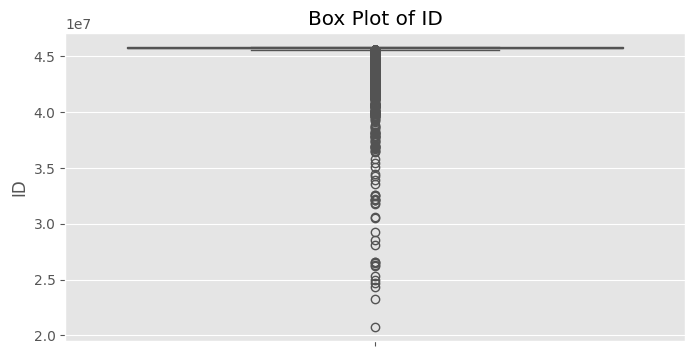

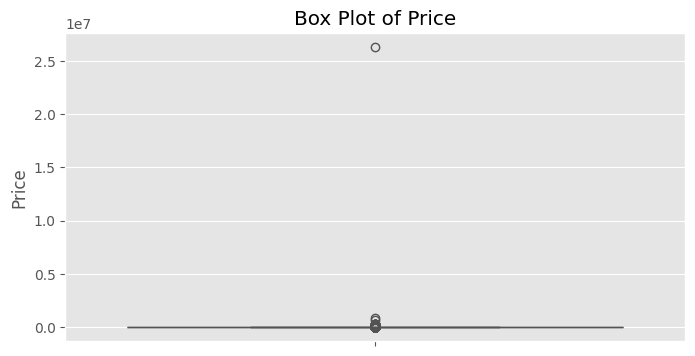

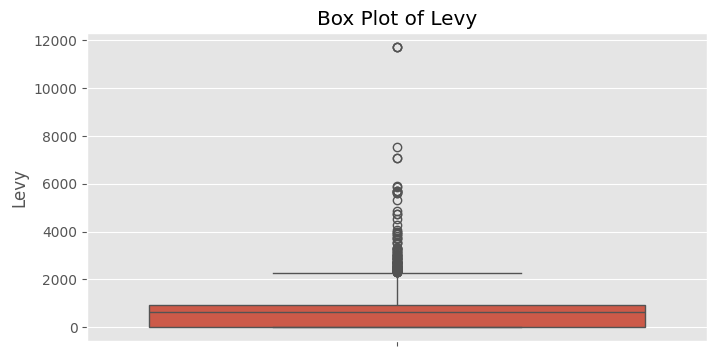

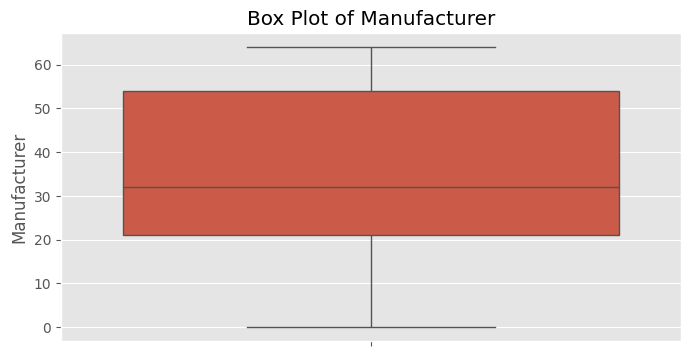

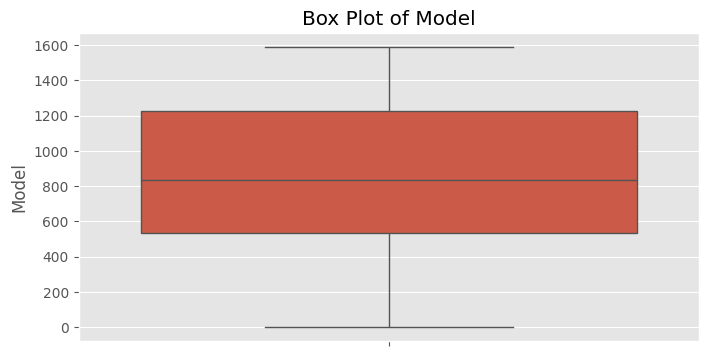

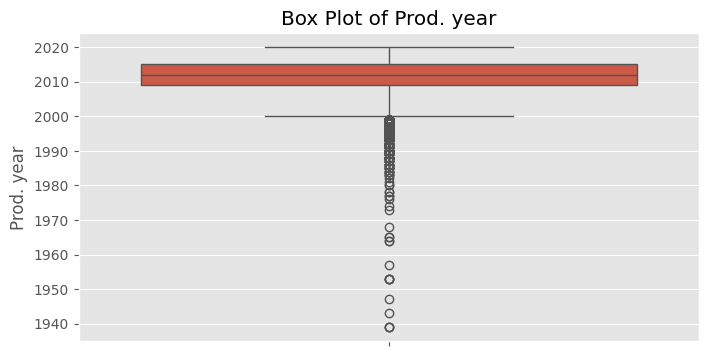

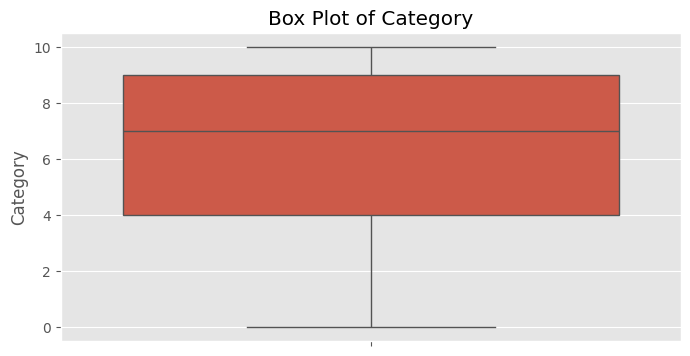

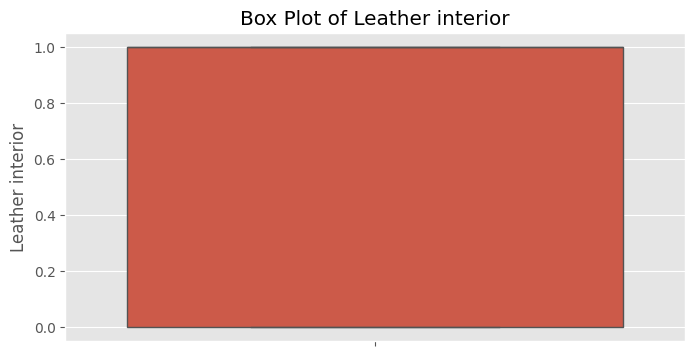

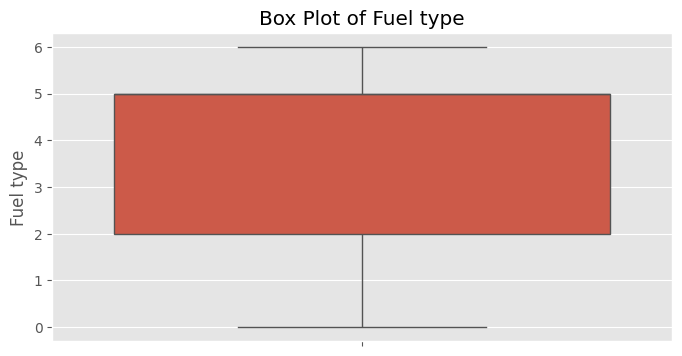

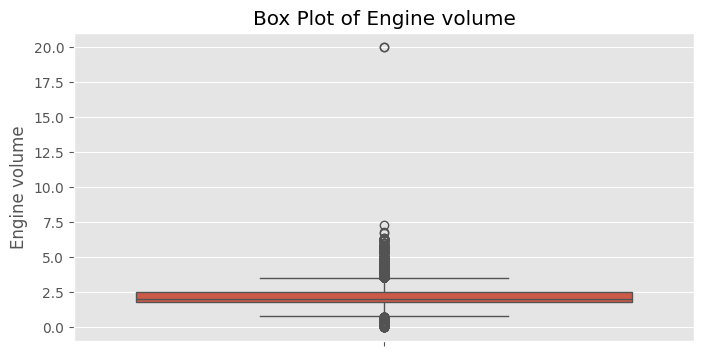

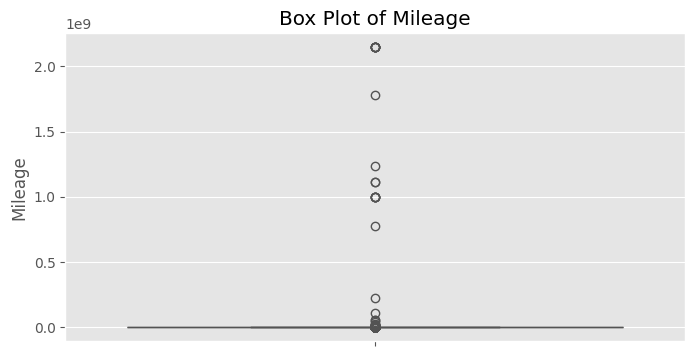

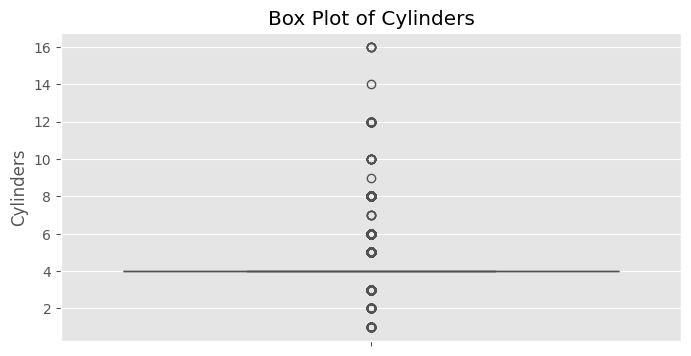

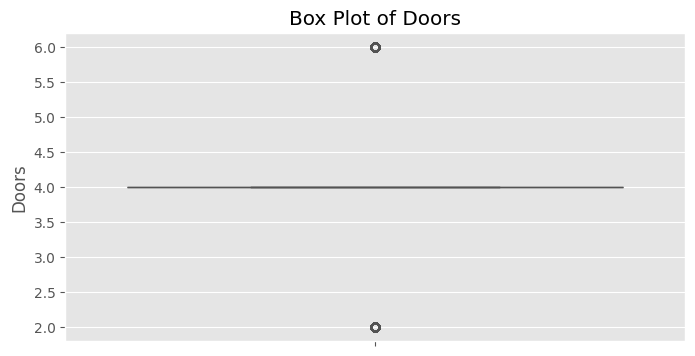

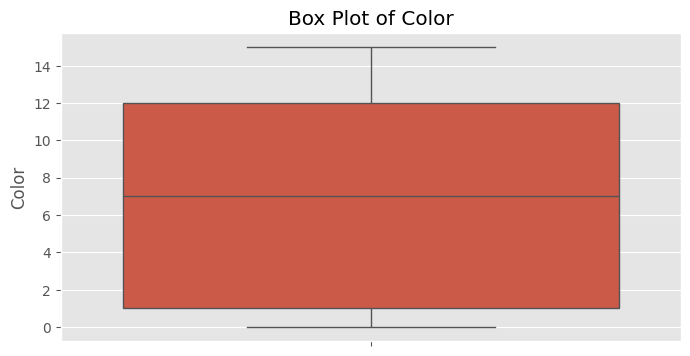

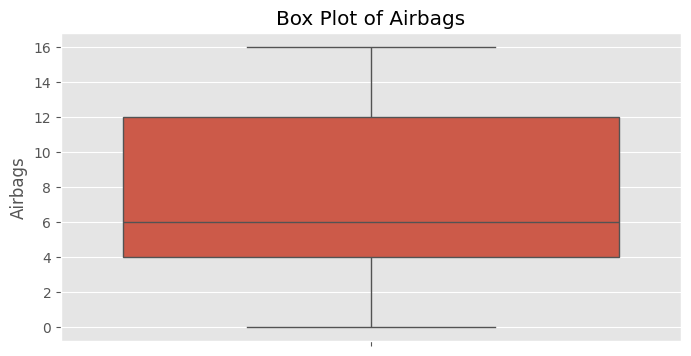

In [12]:
# Box Plot For each Numerical Feature Before Handling Outliers

for feature in numerical_features:
    plt.figure(figsize = (8, 4))
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')

In [13]:
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Trimming Outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Capping Outliers
        df.loc[df[col] > upper_bound, col] = upper_bound
        df.loc[df[col] < lower_bound, col] = lower_bound
    
    return df

# Apply outlier handling to the Price and other numerical columns
handle_outliers(data, numerical_features)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Airbags,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive
0,4.565440e+07,13328,1399.0,32.0,1242.0,2010,4.0,1.0,2.0,3.5,...,12,True,False,False,False,True,False,False,True,False
1,4.553491e+07,16621,1018.0,8.0,658.0,2011,4.0,0.0,5.0,3.0,...,8,False,False,True,False,True,False,False,True,False
2,4.577442e+07,8467,0.0,21.0,684.0,2006,3.0,0.0,5.0,1.3,...,2,False,False,False,True,False,True,False,False,True
3,4.576918e+07,3607,862.0,16.0,661.0,2011,4.0,1.0,2.0,2.5,...,0,True,False,False,False,True,False,False,True,False
4,4.580926e+07,11726,446.0,21.0,684.0,2014,3.0,1.0,5.0,1.3,...,4,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,4.579836e+07,8467,0.0,36.0,385.0,2000,1.0,1.0,0.0,2.0,...,5,False,True,False,False,False,False,True,True,False
19233,4.577886e+07,15681,831.0,23.0,1334.0,2011,9.0,1.0,5.0,2.4,...,8,False,False,True,False,False,True,False,True,False
19234,4.580500e+07,26108,836.0,23.0,1442.0,2010,4.0,1.0,1.0,2.0,...,4,True,False,False,False,False,True,False,True,False
19235,4.579353e+07,5331,1288.0,8.0,456.0,2007,4.0,1.0,1.0,2.0,...,4,True,False,False,False,False,True,False,True,False


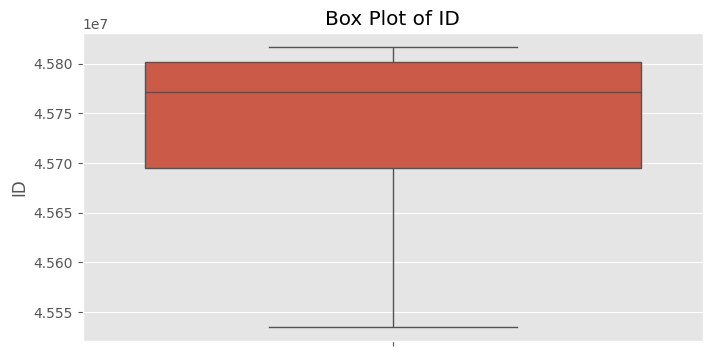

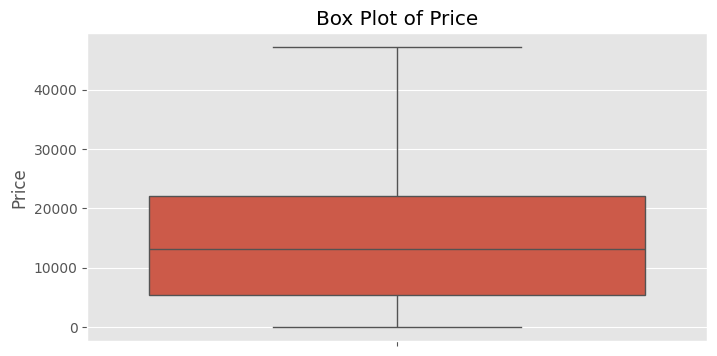

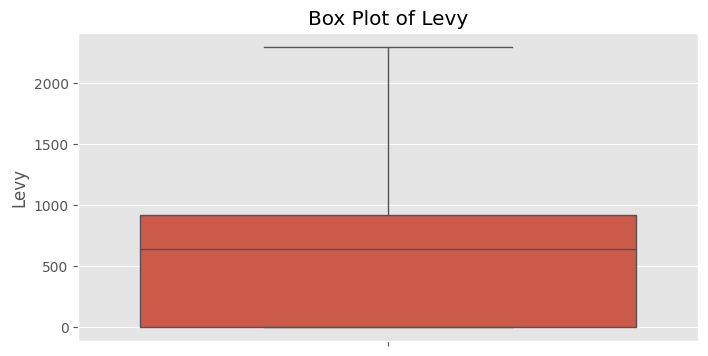

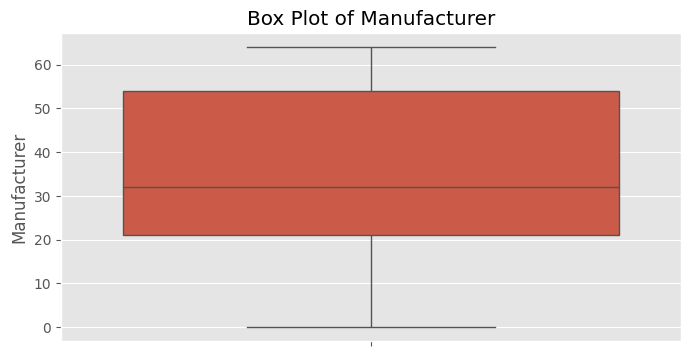

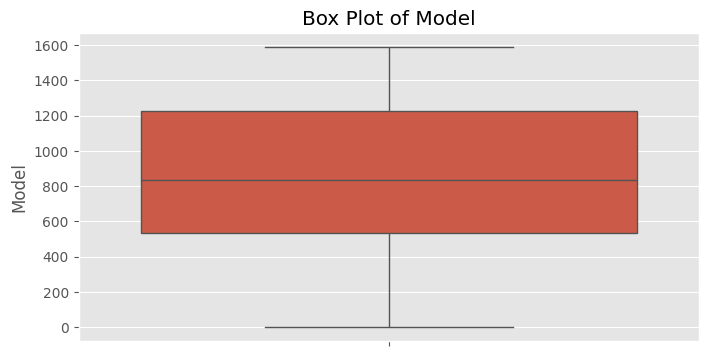

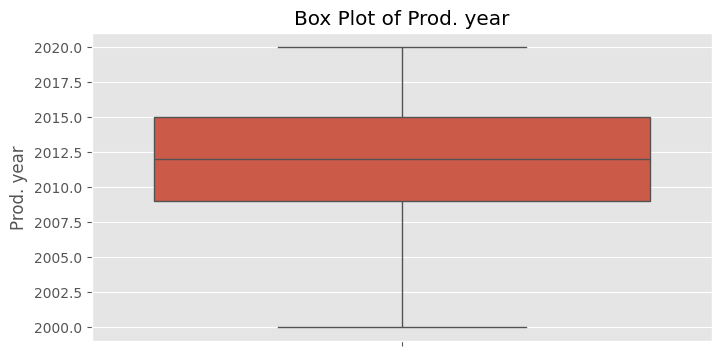

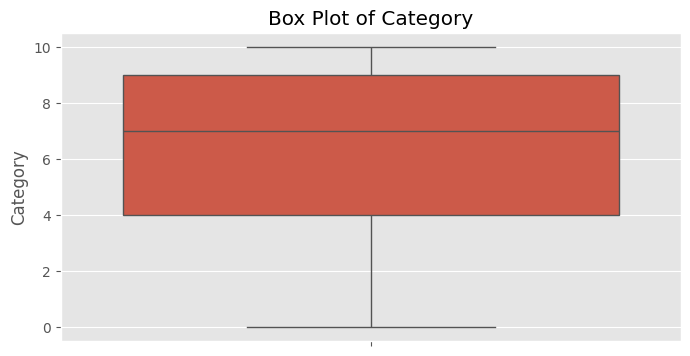

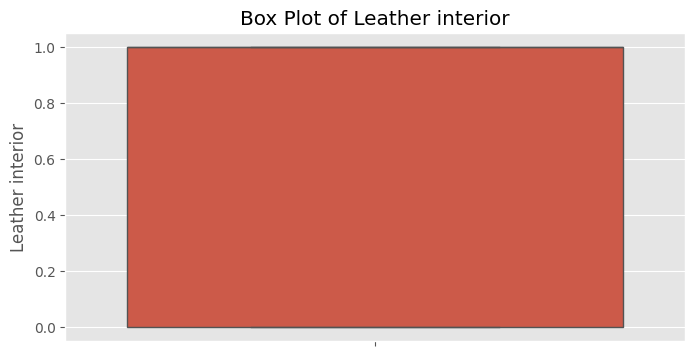

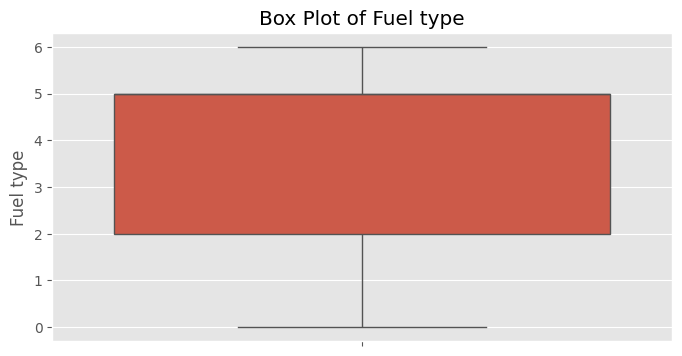

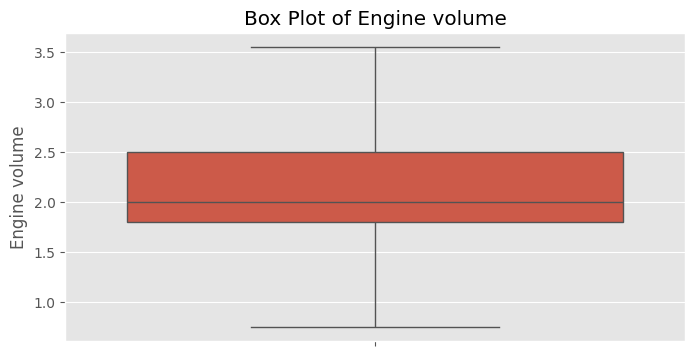

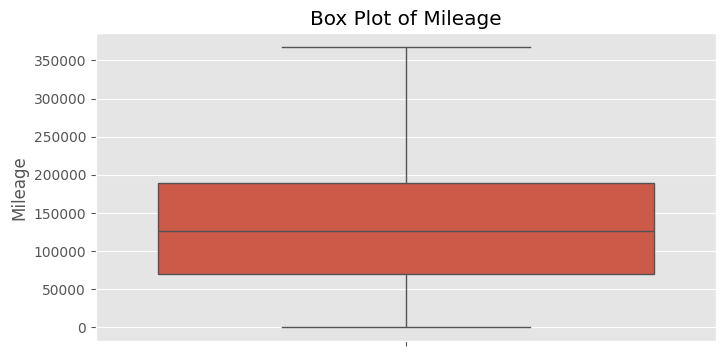

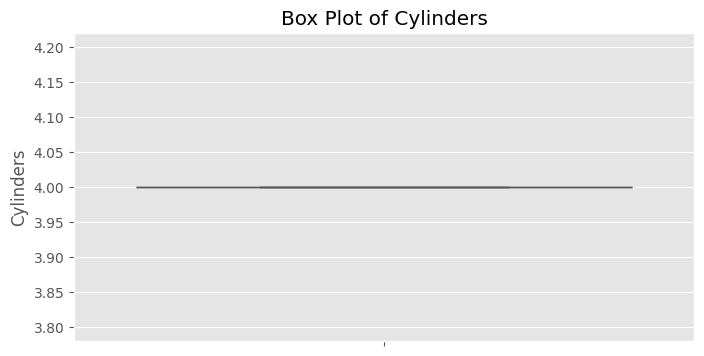

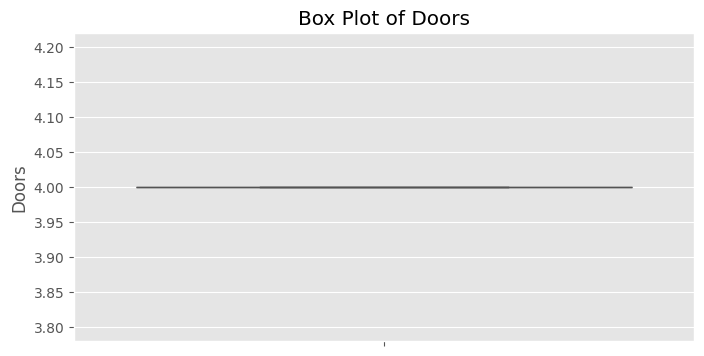

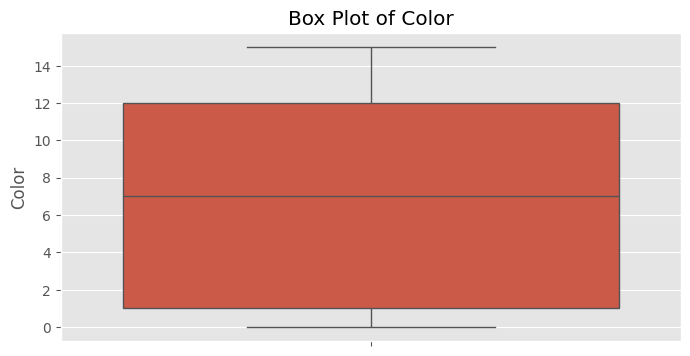

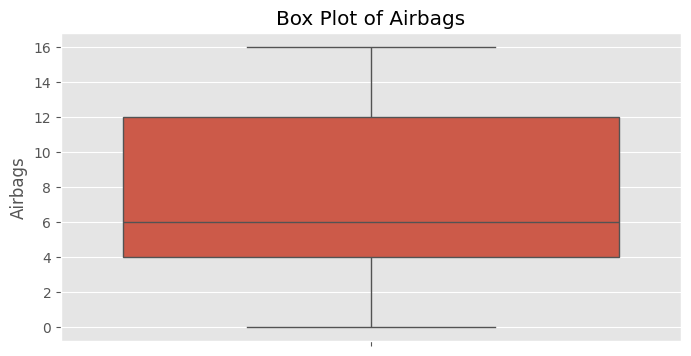

In [14]:
# Box Plot For each Numerical Feature After Handling Outliers

for feature in numerical_features:
    plt.figure(figsize = (8, 4))
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')

## ***-----------------------------------  Visualization  ------------------------------------***

<Figure size 600x1000 with 0 Axes>

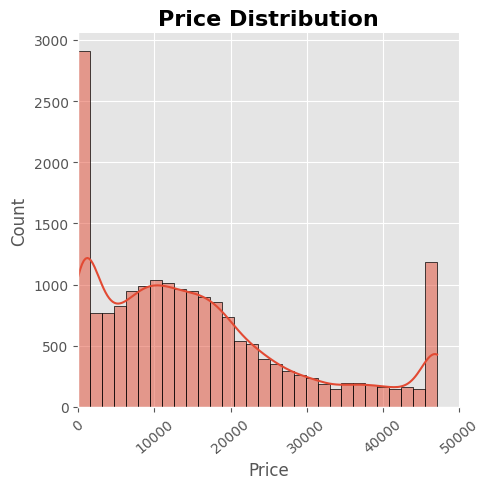

In [15]:
# Price Distribution
plt.figure(figsize = (6, 10))

sns.displot(data["Price"], bins = 30, kde = True, edgecolor = 'black')

plt.title('Price Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

plt.xticks(rotation = 40);
plt.xlim([0, 50000])

plt.tight_layout()
plt.show()

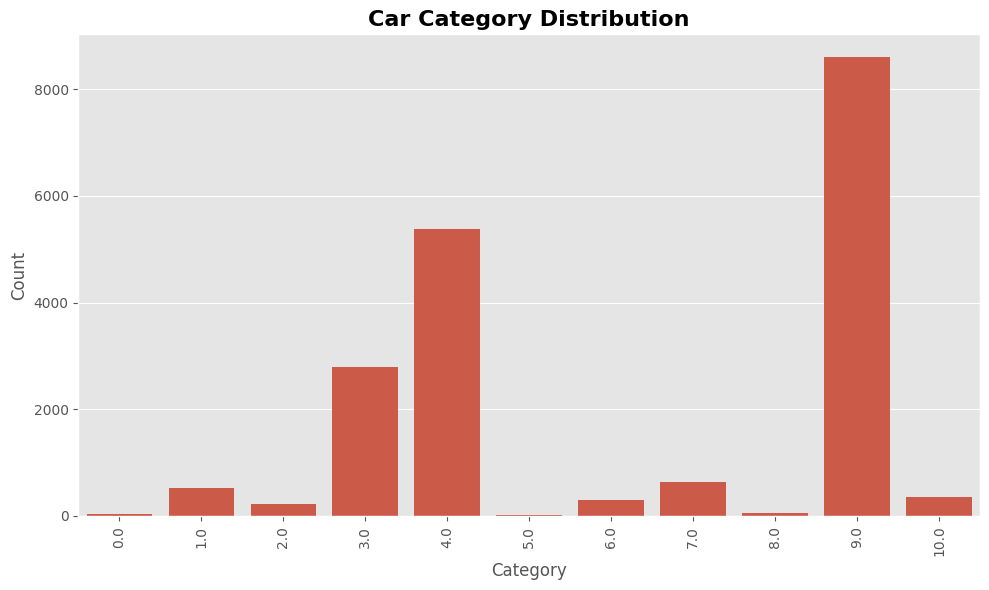

In [16]:
# Car Category Distribution
plt.figure(figsize=(10, 6))

sns.countplot(x='Category', data=data)

plt.title('Car Category Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

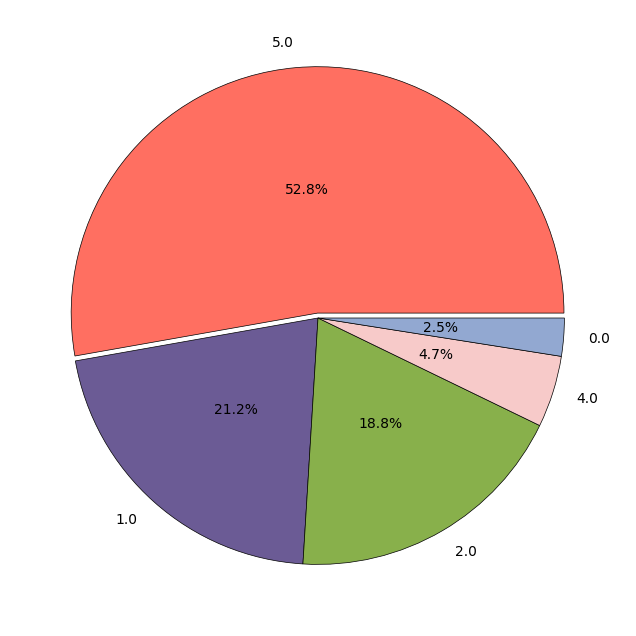

In [17]:
# Fuel Type Distribution
fuel_control = data['Fuel type'].value_counts().reset_index()
fuel_control.drop(index = [5, 6], axis = 0, inplace = True)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
explode = [0.02, 0, 0, 0, 0]

plt.figure(figsize = (8, 8));

plt.pie(fuel_control['count'],
        labels = fuel_control['Fuel type'],
        explode = explode,
        colors = colors,
        autopct = '%1.1f%%',
        pctdistance=0.5,
        wedgeprops = {'edgecolor': 'black', 'antialiased': True},  # 'wedgeprops': Properties for the wedges, here we set the edge color to black
        textprops = {'fontsize': 10, 'color': 'black'});

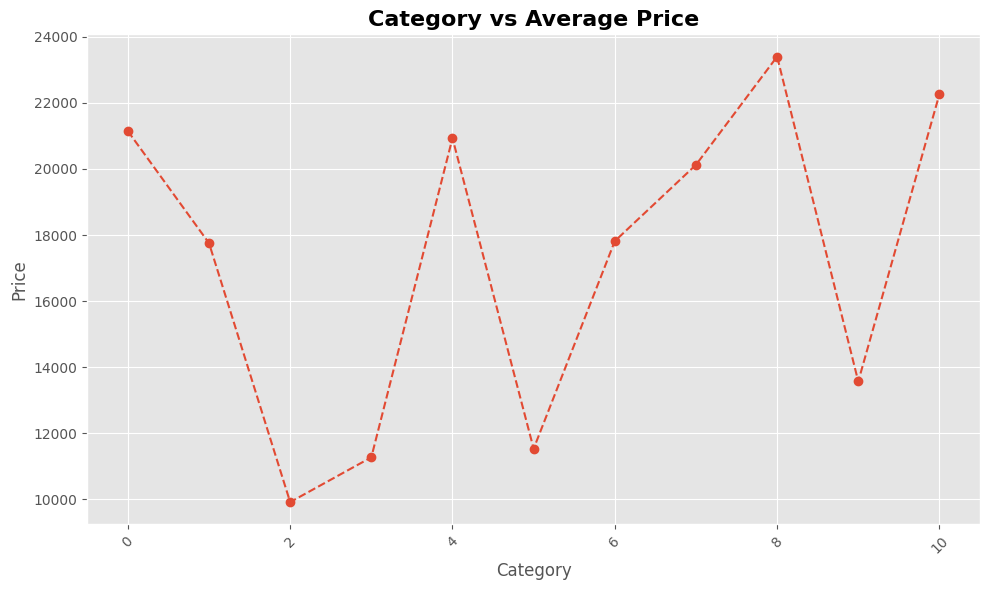

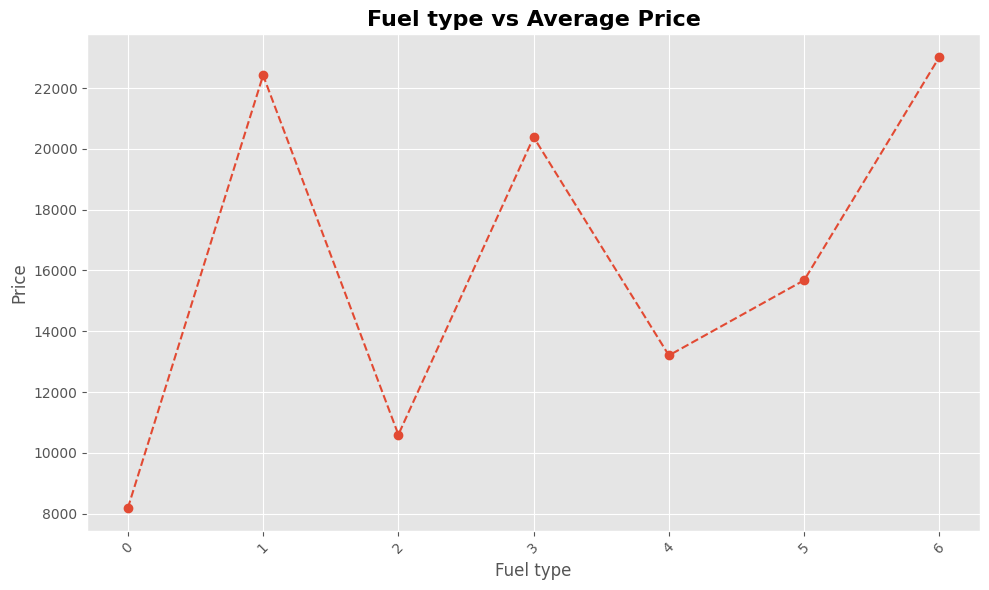

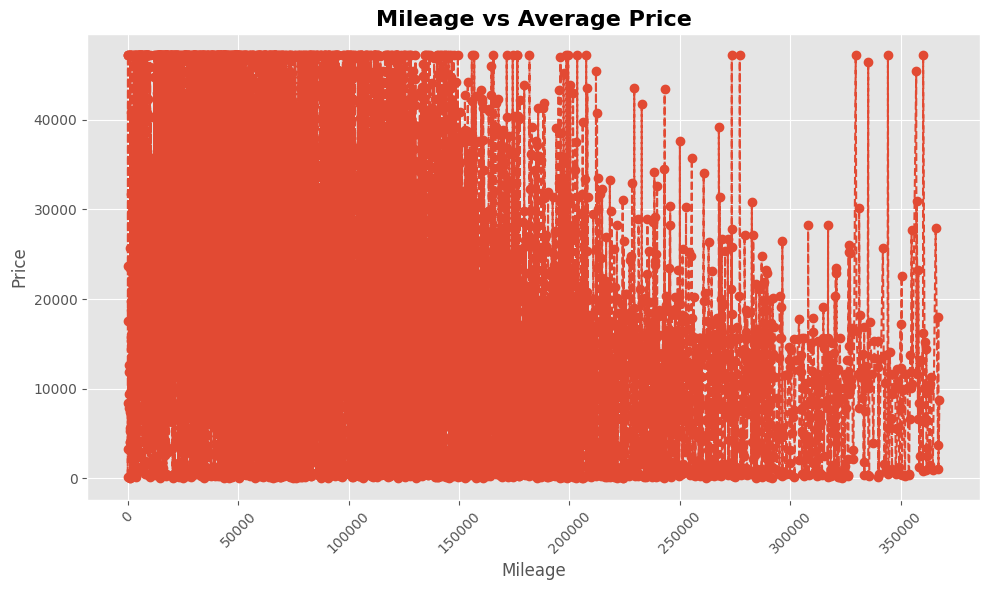

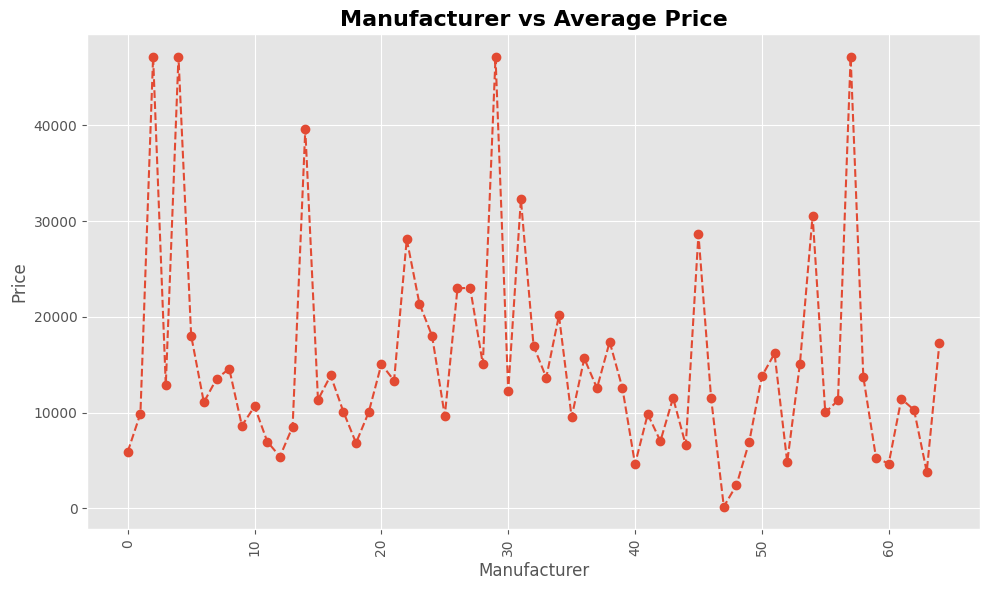

In [18]:
# Price vs Some Features
x_axis_columns = ['Category', 'Fuel type', 'Mileage', 'Manufacturer']

for i, x_axis_column in enumerate(x_axis_columns):

    fig, ax = plt.subplots(figsize = (10, 6))
    x_avg_price = data.groupby(x_axis_column)['Price'].mean().reset_index()

    ax.plot(x_avg_price[x_axis_column], x_avg_price['Price'], linestyle = '--', marker = 'o')
    ax.set_title(f'{x_axis_column} vs Average Price', fontsize = 16, fontweight = 'bold')
    ax.set_xlabel(f'{x_axis_column}', fontsize = 12)
    ax.set_ylabel('Price', fontsize = 12)
    ax.tick_params(axis = 'x', rotation = 45)

    if x_axis_column == 'Manufacturer':
        ax.tick_params(axis = 'x', rotation = 90)

    plt.tight_layout()
    plt.show()

<Axes: >

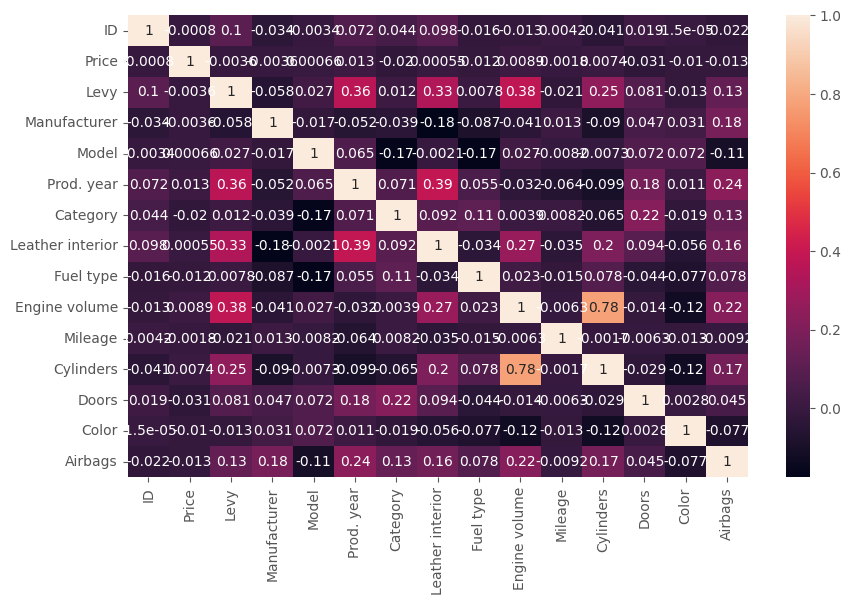

In [19]:
plt.figure(figsize = (10, 6))
sns.heatmap(numerical_features.corr(), annot = True)

## ***------------------------  Model Training and Evaluation  --------------------------***

In [20]:
X = data.drop(['Price'], axis = 1)
y = data['Price']

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Training set (X_train, y_train) : 70% of the total data (13246 rows)
# Validation set (X_val, y_val)   : 15% of the total data (2839  rows)
# Test set (X_test, y_test)       : 15% of the total data (2839  rows)

Train set: 13246 samples
Validation set: 2839 samples
Test set: 2839 samples


In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

rmse = mean_squared_error(y_val, y_val_pred, squared = False)
r2 = r2_score(y_val, y_val_pred)

print("Mean Squared Error:", rmse)
print("Model Score (R^2):", r2)

Mean Squared Error: 6170.077712820652
Model Score (R^2): 0.7870066483263338
